In [39]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline  
# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
dict_events = loading_from_listfolder(folder_selected,'data_BPM_ECG')
# epoch_bandpower_list = loading_from_listfolder(folder_selected,'epoch_bandpower')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\results\Results_ANS\subjectFolderExperiment\s0
cannot be loaded for the subject
D:\results\Results_ANS\subjectFolderExperiment\s01
cannot be loaded for the subject
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Result

# Decoding Results

In [50]:
folderResults = r'D:\results\Results_ANS\Decoding_MI_START_STOP_all_nested\GA'
acc_onoff = loadmat(os.path.join(folderResults,'DataAccuracy_on_off.mat'))
acc_onoff = acc_onoff['DataAccuracy']['mu'][0][0]
acc_onset = acc_onoff[:-1,0]
acc_onset = acc_onset[2:]
print(len(acc_onset))

32


# Average Respiration rate over events

In [51]:
GA_df_events = dict()
list_subjects_events = []
nSubjects = len(dict_events)
for iSubject,dict_subject in enumerate(dict_events):
    dict_subject['SubjectID'] = iSubject
    list_subjects_events.append(dict_subject)
list_subjects_events_conca = pd.concat(list_subjects_events)

Text(0, 0.5, 'Respiration rate')

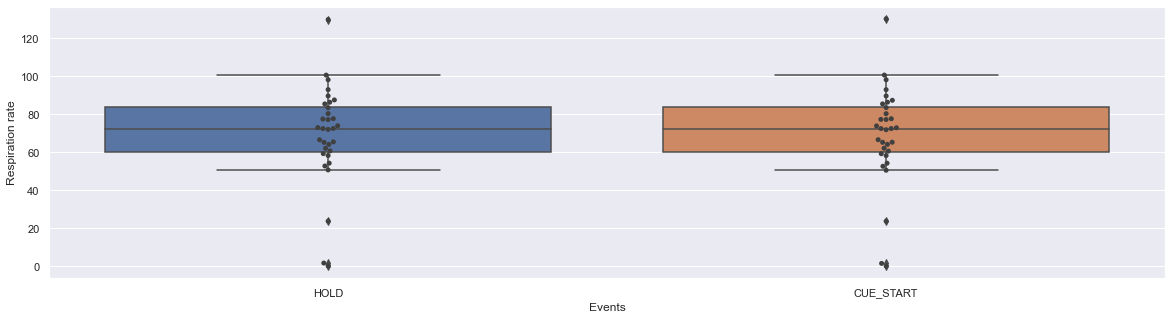

In [52]:
import seaborn as sns
df = list_subjects_events_conca
data_frame = df.groupby(['SubjectID']).mean()
fig = plt.figure(figsize=(20,5))
axs = sns.boxplot(x="variable", y="value", data=pd.melt(data_frame))
axs = sns.swarmplot(x="variable", y="value", 
                    data=pd.melt(data_frame), color=".25")
axs.set_xlabel("Events")
# axs.set_ylim([-0.2,0.2])
axs.set_ylabel("Respiration rate")

# Correlation between RR changes and BCI accuracies

In [53]:
data_frame_array = data_frame.to_numpy()
diff_on = data_frame_array[:,0] - data_frame_array[:,1]
# diff_on = data_frame_array[:,1]

In [54]:
print(len(acc_onset),len(diff_on))

32 32


In [55]:
# First quartile (Q1) 
Q1 = np.percentile(diff_on, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(diff_on, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
outliers_index = np.where(diff_on<Q1-1.5*IQR) or np.where(diff_on>Q3+1.5*IQR)
# outliers_index = np.where(diff_on == np.min(diff_on))
print(outliers_index)

diff_on_new = [diff_on[i] for i, x in enumerate(diff_on) if i not in outliers_index]
acc_onset_new = [acc_onset[i] for i, x in enumerate(acc_onset) if i not in outliers_index]

(array([15], dtype=int64),)


In [56]:

# outliers_index = np.where(diff_on_new == np.max(diff_on_new))
print(outliers_index)
outliers_index = []
diff_on_new = [diff_on_new[i] for i, x in enumerate(diff_on_new) if i not in outliers_index]
acc_onset_new = [acc_onset_new[i] for i, x in enumerate(acc_onset_new) if i not in outliers_index]

(array([15], dtype=int64),)


31 31


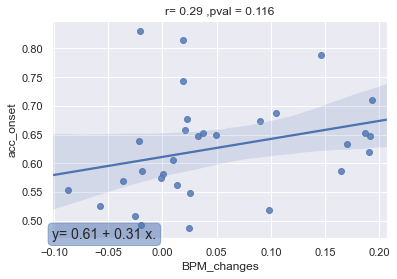

In [58]:
import seaborn as sns; 
import scipy
from scipy.stats import linregress
sns.set(color_codes=True)

print(len(diff_on_new),len(acc_onset_new))
X = diff_on_new
y = acc_onset_new
slope, intercept, r_value, p_value, stderr = linregress(X, y)

dict_diff = {'BPM_changes':diff_on_new,'acc_onset':acc_onset_new}
diff_frame = pd.DataFrame.from_dict(dict_diff)

fig = plt.figure()
g = sns.regplot(x="BPM_changes", y="acc_onset",data=diff_frame,fit_reg=True)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y= {} + {} x.'.format(np.round(intercept,2),np.round(slope,2))
g.text(0.0, 0.0, textstr, transform=g.transAxes, fontsize=14, bbox=props)
textstr = 'r= {} ,pval = {}'.format(np.round(r_value,2),np.round(p_value,3))
plt.title(textstr)
path = os.path.join(folderGA,'Correlation_Respiration')
saving_figure('acc_onset1_heartbeat',path,fig)

# Saving Variable

In [59]:
path  = os.path.join(folder_selected,'GA','test_mediation4_JASP.csv')
print(path)
diff_frame.to_csv(path)

D:\results\Results_ANS\subjectFolderExperiment\GA\test_mediation4_JASP.csv
